# Assignment 1 - part 1

## Feed forward network (multilayer perceptron)

Develop the complete training and evaluation pipeline for a fully connected feed forward network.
This shall cover all the stages discussed in the course, starting from data preparation and finishing with model evaluation.
You can (you should) use the full functionality of PyTorch and all its packages.

You can write most of your code as standard python scripts and packages outside jupyter notebook.
The calls to the functionality shall, however, be executed from this notebook (not command-line).
All printouts and images should also be displayed in this notebook.

### Model training and evaluation

Define the function `mlp_train` for training and evaluating an MLP model for classification of **FashionMNIST** data.
The function shall be flexible so that it can take in the parameters listed in the code cell bellow. We will test it with various values!

The architecture of the MLP shall follow the standard sequential structure of linear layers alternating with non-linearieties (you decide which one).
The number of layers within the network and their hidden size shall be specififed by the `hidden_dims` vector, that the user can set arbitrarily.
All other decisions related to the complete train and test pipeline you need to do on your own.

The `mlp_train` function shall return 
* the trained model `mlp_model`
* train and test losses in a 2-long tuple `(train_losses, test_losses)`, where train and test losses are simple python lists
* anything else you deem important or useful (this is for you really, in case you want to re-use the function later etc.)

Furthermore, the function shall be able to produce monitoring plots of train and test losses and train and test accuracies.
There is no pre-defined design for the plots.
However, you shall annotate the graphs so that they are well readable and understandable.

For this assignment I tried to generalize the training so much, that I can use the same functions for the CNN (You will see with the next assignment). For this, the mlp_train function (can be found in mlp.py) only coordinates the necessary steps (initializing the model, training the model, plotting the result/return the result) on the highest abstraction level. This function uses the init_mlp function from the same module to initialize the mlp with the fixed input/output dimensions for the FashionMNIST-task and any number of hidden dimensions. For the training-step, the training method from the training.py module that works for (almost) every "standard" model is used. The training and test/validation step could be extracted for better reusability, but here I refrained from doing so in order not to reduce the performance any further. Plotting the results is done via the plot_training function in the utils.py module. I only plotted the accuracy/loss of the next cell and not in the last part of this notebook to save on time and disk-space. The output of the training-process can be turned on and off with the plots(for the plotting) and verbose(for the text output) parameters.

Using cpu for training


C:\Python39\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Epochs:   0%|          | 0/10 [00:00<?, ?it/s]

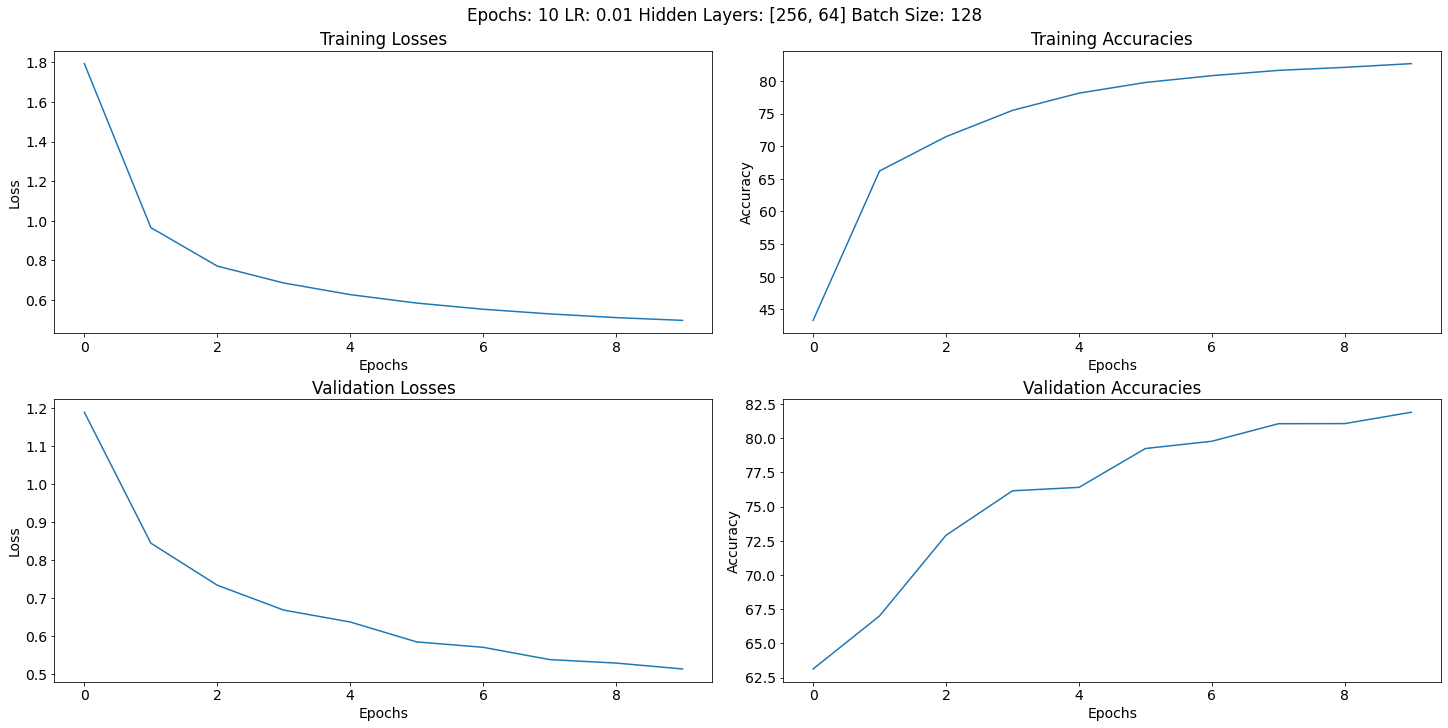

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=64, bias=True)
  (4): ReLU()
  (5): Linear(in_features=64, out_features=10, bias=True)
)


In [1]:
# define function mlp_train so that it can be run from this cell
from mlp import mlp_train

# user paramters
hidden_dims = [256, 64]  # list of hidden layer dimensions
epochs = 10  # number of epochs
batch_size = 128  # training batch size
learning_rate = 0.01  # learning rate
cuda = False  # true or false to train the model on cuda or not
plots = True  # true or false to produce plots of train and test losses and accuracies
verbose = False # true or false to get console output of every epochs loss/accuracy

# train and evaluate mlp_model
mlp_model, losses, accuracies = mlp_train(hidden_dims, epochs, batch_size, learning_rate, cuda, plots, verbose)
print(mlp_model)

### Model application

Define a simple utility function `mlp_apply` that uses the train model to classify 10 examples of the test set and displays the 10 images in a grid together with their true and predicted labels.

The mlp_apply function was implemented using the torch.argmax() function as well as the plotting/ visualization function plot_predictions from utils.py.
As you can see, with only 10 epochs and arbitrary hyperparameters, out of the first 10 test samples only 2 were misclassified. Those two are sandal <-> shoe and shirt <-> sweater which look pretty much alike.

Accuracy 80.0% on Test Samples: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] (count: 10)


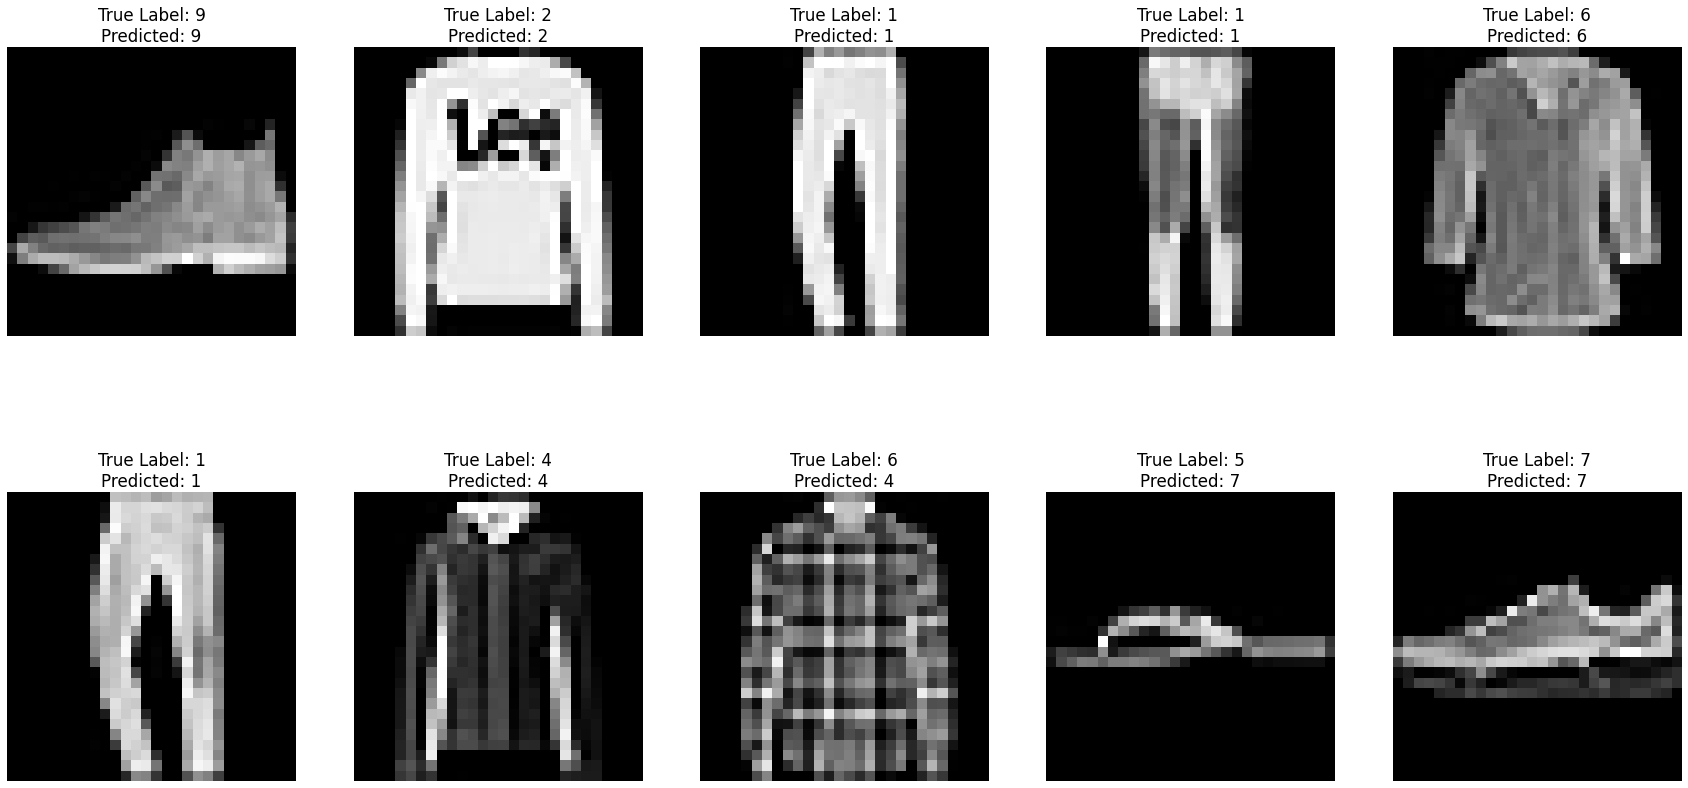

In [2]:
# define function mlp_train so that it can be run from this cell
from mlp import mlp_apply

# user parameters
test_indexes = [i for i in range(10)]  # list of 10 indexes - examples to extract from test set

mlp_apply(mlp_model, test_indexes)

### Train and apply model

Use your functions defined above to train the mlp model. Try different values of the hyper-paramter (user parameters) settings. You shall achieve at least 85% test accuracy.

Produce the results (plots etc.) here and comment shortly on the results and the hyper-parameters you tested.

In this step I used different hyperparameters to train different models. All of those hyperparameters were chosen more or less arbitrary to cover a reasonable range of values. All of those combinations were also done with and without batch-normalization, which is evaluated down below.

In [ ]:
from mlp import mlp_train
import pandas as pd
learning_rates = [0.001, 0.01, 0.1]
epochs = [5, 10, 25]
batch_sizes = [64, 128]
hidden_dimbims = [[400, 200],[256, 128, 64]]
batchnorm_true_false = [True, False]
cuda = False
plots = False
verbose = False

results = []

for batchnorm in batchnorm_true_false:
    for epoch in epochs:
        for learning_rate in learning_rates:
            for batch_size in batch_sizes:
                for hidden_dims in hidden_dimbims:
                    _, losses, accuracies = mlp_train(hidden_dims=hidden_dims,
                                                    epochs=epoch,
                                                    batch_size=batch_size,
                                                    learning_rate= learning_rate,
                                                    cuda=cuda,
                                                    plot=plots,
                                                    verbose=verbose,
                                                    batchnorm=batchnorm)
                    results.append([batchnorm, hidden_dims, epoch, batch_size, learning_rate,
                                    losses[0][-1], losses[1][-1], accuracies[0][-1], accuracies[1][-1]])

resultframe = pd.DataFrame(results, columns=["batchnorm used", "Hidden Dimensions", "Epoch", "Batch Size", "Learning Rate",
                                             "Training Loss", "Test Loss", "Training Accuracy","Test Accuracy"])

In [23]:
resultframe

,batchnorm used,Hidden Dimensions,Epoch,Batch Size,Learning Rate,Training Loss,Test Loss,Training Accuracy,Test Accuracy
0,True,"[400, 200]",5,64,0.001,0.469356,0.466284,85.121667,84.58
1,True,"[256, 128, 64]",5,64,0.001,0.592402,0.555610,83.768333,83.42
2,True,"[400, 200]",5,128,0.001,0.584449,0.579888,82.878333,82.36
3,True,"[256, 128, 64]",5,128,0.001,0.780111,0.745720,80.930000,80.48
4,True,"[400, 200]",5,64,0.010,0.294104,0.373878,89.610000,86.63
...,...,...,...,...,...,...,...,...,...
67,False,"[256, 128, 64]",25,128,0.010,0.397536,0.451263,85.976667,83.81
68,False,"[400, 200]",25,64,0.100,0.169581,0.338306,93.610000,88.54
69,False,"[256, 128, 64]",25,64,0.100,0.179386,0.368863,93.185000,88.50
70,False,"[400, 200]",25,128,0.100,0.205007,0.330782,92.315000,88.15


In [4]:
# save result in case something goes wrong
resultframe.to_excel("mlp_results.xlsx")

In [ ]:
resultframe = pd.read_excel("mlp_results.xlsx")

In [13]:
top_10 = resultframe.sort_values(by="Test Accuracy", ascending=False).head(10)
top_10

,batchnorm used,Hidden Dimensions,Epoch,Batch Size,Learning Rate,Training Loss,Test Loss,Training Accuracy,Test Accuracy
28,True,"[400, 200]",25,64,0.010,0.125561,0.368003,95.510000,88.81
68,False,"[400, 200]",25,64,0.100,0.169581,0.338306,93.610000,88.54
69,False,"[256, 128, 64]",25,64,0.100,0.179386,0.368863,93.185000,88.50
18,True,"[400, 200]",10,128,0.010,0.209358,0.335866,92.575000,88.38
24,True,"[400, 200]",25,64,0.001,0.248966,0.345895,91.476667,88.37
17,True,"[256, 128, 64]",10,64,0.010,0.241359,0.356155,91.346667,88.36
22,True,"[400, 200]",10,128,0.100,0.215973,0.334938,91.798333,88.24
23,True,"[256, 128, 64]",10,128,0.100,0.218033,0.338945,91.855000,88.19
70,False,"[400, 200]",25,128,0.100,0.205007,0.330782,92.315000,88.15
56,False,"[400, 200]",10,64,0.100,0.264192,0.335917,90.225000,88.02


As you can see in the top 10 results, every hyperparameter with the exception of doing only 5 epochs appears. The Test Accuracies which are the results of the Validation step with unseen examples range from below 20% up to almost 90%. For the results in the lower range, the combination of small learning rate and low number of epochs might be the cause (see for example index 39(in the notebook or in the provided .xslx the html does not really work out), the model was simply far from converging. In general you can say that low learning rates need more epochs and are more prone to end up in a local minima. To solve this, more sophisticated optimizing functions like ADAM can be used. In this case I used the "vanilla" SGD method and crossentrophy loss for training. This can be further evaluated in the future assignments which are more "performance-focussed".

### Optional voluntary exercise

Try to enhance your MLP architecture by using droppout and/or batchnorm. Can you achieve better results with the same number of epochs?

In [22]:
BN_better_count = 0.0
for i in range(36):
    if resultframe.iloc[i]["Test Accuracy"] >= resultframe.iloc[i + 36]["Test Accuracy"]:
        BN_better_count +=1
print(f"Using Batchnormalization yielded better results in terms of Test Accuracy in: {BN_better_count} of {len(resultframe) / 2} cases.")

Using Batchnormalization yielded better results in terms of Test Accuracy in: 30.0 of 36.0 cases.


As seen above, adding Batchnormalization between every layer seems to enhance the Accuracy. Even though only in 6 out of the 10 top10 results batchnormalization was used. With the direct comparrison of two models with the same hyperparamters, those with batch-normalization yielded better results 5 out of 6 times.